In [10]:
import numpy as np
import pandas as pd
from scipy import stats,spatial,sparse
from sklearn import manifold,datasets
import time
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import scanpy as sc
import matplotlib as mpl

In [3]:
import warnings
from numba.core.errors import NumbaDeprecationWarning
warnings.simplefilter('ignore', category=NumbaDeprecationWarning)
warnings.simplefilter('ignore', category=RuntimeWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [4]:
adata = sc.read_h5ad('rc.integrated.data.h5ad')
adata

AnnData object with n_obs × n_vars = 110427 × 17513
    obs: 'cell_type', 'cell_type2'
    uns: 'consensus_time', 'iroot'
    obsm: 'X_pca', 'umap'

In [5]:
consensus_time = pd.read_csv("rc.integrated.consensus.time.csv",index_col=0)
dpt_pseudotime = pd.read_csv('rc.integrated.dpt_pseudotime.csv',index_col=0)
palantir_time = pd.read_csv("rc.integrated.palantir_pseudotime.csv",index_col=0)
monocle_time = pd.read_csv("rc.integrated.monocle_pseudotime.csv",index_col=0)
dtne_time = pd.read_csv("rc.integrated.dtne_pseudotime.csv",index_col=0)

In [6]:
consensus_time = consensus_time.values.reshape(-1)
dpt_pseudotime = dpt_pseudotime.values.reshape(-1)
palantir_time = palantir_time.values.reshape(-1)
monocle_time = monocle_time.values.reshape(-1)
dtne_time = dtne_time.values.reshape(-1)
time_list = [consensus_time,dpt_pseudotime,palantir_time,monocle_time,dtne_time]

In [8]:
Y_pca = adata.obsm['X_pca']
pd.DataFrame(Y_pca).to_csv('rc.integrated.Y_pca.csv')

In [7]:
umap = adata.obsm['umap']

In [11]:
pd.DataFrame(umap).to_csv('rc.integrated.Y_umap.csv')

Text(-0.9, 1.05, 'pseudotime')

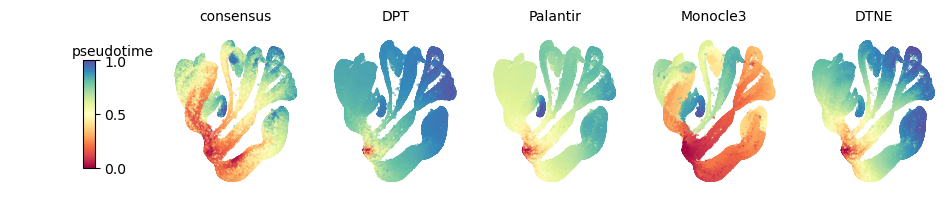

In [8]:
names = ['consensus','DPT','Palantir','Monocle3','DTNE']
cmap = 'Spectral'
fig,axes = plt.subplots(ncols=6,figsize=(12, 2))

for i,ax in enumerate(axes):
    if i == 0:
        ax0 = ax
    else:
        ax.set_title(names[i-1],size=10,pad=10)
        # sns.scatterplot(x=umap[:, 0], y=umap[:, 1], hue=time_list[i], ax=ax,s=80, palette=cmap, alpha=0.8)
        im = ax.scatter(x=umap[:, 0], y=umap[:, 1],c=time_list[i-1], s =0.1,cmap= cmap)
        ax.axis("off")
        # ax.legend().remove()



cax=fig.add_axes([ax0.get_position().x1-0.05, ax0.get_position().y0 +0.1, 0.01, ax0.get_position().height*0.7])
ax0.axis("off") 

cb = fig.colorbar(im,cax=cax, shrink=0.5,pad=0.3, location = 'right') # title= "pseudotimes", fontsize = 5,title_fontsize=15

ax = cb.ax
ax.text(-0.9,1.05,'pseudotime',rotation=0, )

# divider = make_axes_locatable(ax0)
# cax = divider.append_axes("right", size="5%", pad=0.05)

# fig.tight_layout()

# plt.savefig('./comp.png', format='png', dpi=1000)
# plt.savefig('./comp.pdf', format='pdf', dpi=1000)

In [9]:
pca_y = adata.obsm['X_pca']
umap_y = pd.read_csv("rc.integrated.umap_y.csv",index_col=0)
tsne_y = pd.read_csv("rc.integrated.tsne_y.csv",index_col=0)
phate_y = pd.read_csv("rc.integrated.phate_y.csv",index_col=0)
dtne_y = pd.read_csv("rc.integrated.dtne_y.csv",index_col=0)

In [9]:
cell_type = adata.obs['cell_type']
pd.DataFrame(cell_type).to_csv('rc.integrated.cell_type.csv')

In [11]:
sample_labels = cell_type.values.reshape(-1)
data_clusters_set = set(sample_labels)
zip_types = zip(sorted(data_clusters_set),range(len(data_clusters_set)))
dict_types = dict(zip_types)
cell_clusters  =  [dict_types[i] for i in sample_labels]

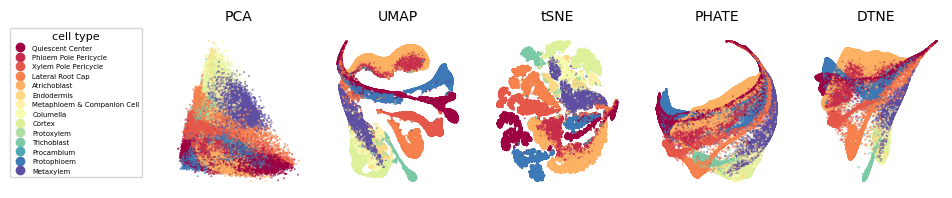

In [12]:
names = ['PCA','UMAP','tSNE','PHATE','DTNE']
name_Y = [umap_y,tsne_y,phate_y,dtne_y]
cmap = 'Spectral'
fig,axes = plt.subplots(ncols=6,figsize=(12, 2))
for i,ax in enumerate(axes):
    if i == 0:   
        ax0 = ax
        ax0.axis("off")
    else:
        ax.set_title(names[i-1],size=10,pad=10)
        if  i == 1:
            scatter = ax.scatter(pca_y[:,0],pca_y[:,1],c= cell_clusters,s=0.1,cmap= cmap)
        else:
            im = ax.scatter(x=name_Y[i-2]['0'], y=name_Y[i-2]['1'],c=cell_clusters, s =0.1,cmap= cmap)
            # sns.scatterplot(x=umap[:, 0], y=umap[:, 1], hue=time_list[i], ax=ax,s=80, palette=cmap, alpha=0.8)
            #
            # handles, labels = ax.get_legend_handles_labels()
        ax.axis("off")
        
handles, labels = scatter.legend_elements()
fig.legend(handles, list(data_clusters_set), loc=3, ncol=1, bbox_to_anchor=(0.12, 0.15), frameon=True, title= "cell type",fontsize = 5,title_fontsize=8)

In [13]:
from scipy import stats,spatial,sparse

In [14]:
def correlation_comparation(list_A,list_B):
    pearsonr_res = stats.pearsonr(list_A, list_B)
    spearmanr_res = stats.spearmanr(list_A, list_B) 
    tau, p_value = stats.kendalltau(list_A, list_B)
    return pearsonr_res.statistic,spearmanr_res.statistic,tau

In [15]:
dpt_corr = correlation_comparation(consensus_time,dpt_pseudotime)
dpt_corr

(0.6982703032457015, 0.8064800498317527, 0.6119704811843804)

In [16]:
palantir_corr = correlation_comparation(consensus_time,palantir_time)
palantir_corr

(0.7582639417467973, 0.7608020772524511, 0.5669441857498467)

In [17]:
monocle_corr = correlation_comparation(consensus_time,monocle_time)
monocle_corr

(0.482239490959295, 0.5236041163355246, 0.36345991901439745)

In [18]:
dtne_corr = correlation_comparation(consensus_time,dtne_time)
dtne_corr

(0.79754901122943, 0.8108127474904366, 0.6129977351716356)

(0.0, 1.1)

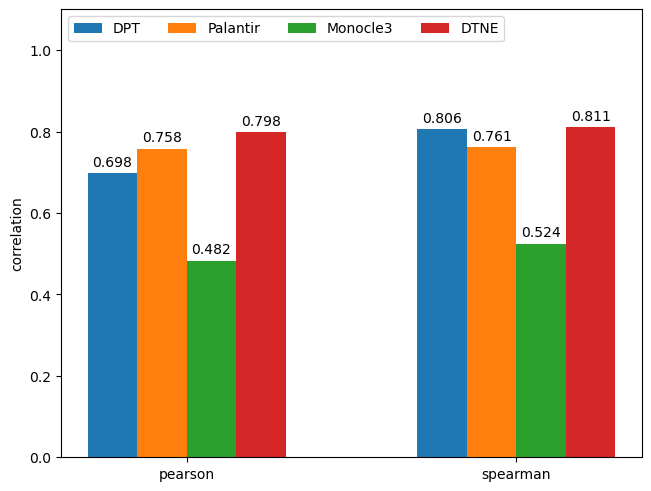

In [20]:
correlation = ['pearson','spearman']
pseudotime_corr = {
    'DPT':(0.698, 0.806),
    'Palantir':(0.758, 0.761),
    'Monocle3':(0.482, 0.524),
    'DTNE':(0.798, 0.811)
    }

x = np.arange(len(correlation))  # the label locations
width = 0.15  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for name, corr in pseudotime_corr.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, corr, width, label=name)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_ylabel('Length (mm)')
# ax.set_title('Penguin attributes by species')
# ax.set_xticks(x + width, species)
# ax.legend(loc='upper left', ncols=3)
# ax.set_ylim(0, 250)
ax.set_ylabel('correlation')
ax.set_xticks(x + 1.5*width, correlation)
ax.legend(loc='upper left', ncols=4)
ax.set_ylim(0, 1.1)